<a href="https://colab.research.google.com/github/pndang/Project_WHEL/blob/main/exploratory_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Author: Phu Dang
# Date: 02.21.2023
# Mentor: Professor Niema Moshiri, Niema Lab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
cd /content/drive/MyDrive/NIEMA_Lab/WHEL_Data/Preprocessed-Data

/content/drive/MyDrive/NIEMA_Lab/WHEL_Data/Preprocessed-Data


In [7]:
!ls

bcep_tf.csv  ovrt_phu.csv


In [8]:
bcep_tf = pd.read_csv("bcep_tf.csv")
bcep_tf.rename(columns={"Unnamed: 0": "og_idx", "mental health": "mentalhealth"}, inplace=True)
bcep_tf.head()

,og_idx,id,lutein_ovt,cryptox_ovt,lycopene_ovt,alphacar_ovt,betacar_ovt,intgrp,vitality,brcastatus,...,recur_flag,yrsdx_rand,yrsrand_endr,yrsdx_endr,yrsdx_endd,QOL,optimism,physhealth,mentalhealth,genhlth
0,0,1018,-0.0347,0.0303,-0.0820,0.0918,0.8330,3,1,0,...,0,1.382615,10.861054,12.243669,12.243669,93.500000,24.0,97.500,89.500000,90.0
1,1,1019,0.4003,0.0880,-0.0739,0.1937,0.3823,4,1,0,...,0,3.556468,10.861054,14.417522,14.417522,83.457031,16.0,88.750,78.164062,85.0
2,2,1022,0.0056,-0.0503,-0.2200,0.0528,0.3148,3,1,0,...,0,2.861054,10.861054,13.722108,13.722108,92.625000,17.0,96.250,89.000000,85.0
3,3,1026,-0.1215,-0.3689,-0.3149,0.0722,0.3063,4,1,0,...,0,1.336071,10.861054,12.197125,12.197125,74.832031,15.0,83.750,65.914062,65.0
4,4,1027,0.1232,0.1394,0.4131,0.0773,0.9563,4,1,0,...,0,3.279945,10.861054,14.140999,14.140999,79.000000,17.0,85.625,72.375000,85.0


In [9]:
bcep_tf.shape

(1937, 31)

In [10]:
def rolling_var(dataset, x, target, range):

  min = dataset[x].min()
  max = dataset[x].max()

  x_values = np.arange(min, max, 1)
  variances = []

  for i in x_values:
    subset = dataset.query(f'{i-range}<={x}<={i+range}')
    var = np.var(subset[target])
    variances.append(var)
  
  return x_values, variances


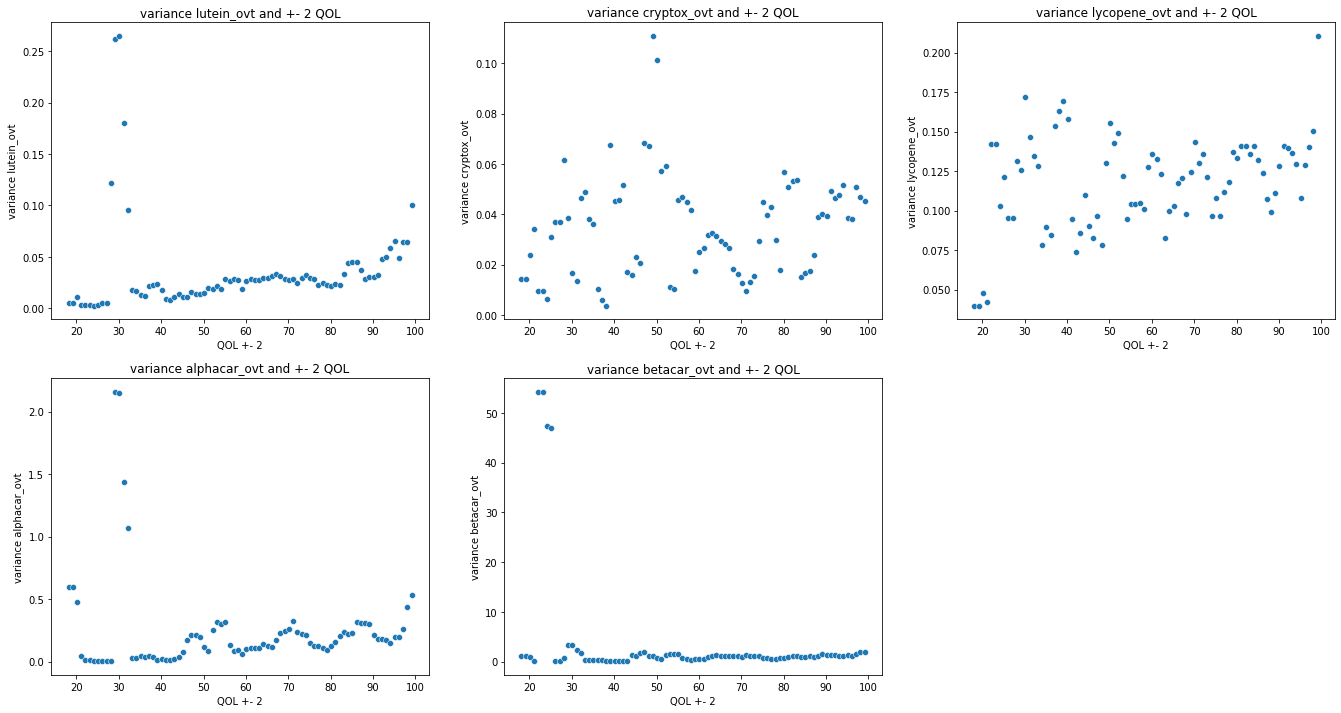

In [11]:
# Plotting the QOL intervals and variances

idx = 1
plt.figure(figsize=(23, 12))
target_col = ['lutein_ovt', 'cryptox_ovt', 'lycopene_ovt', 'alphacar_ovt', 'betacar_ovt']
for col in target_col:
  x, y = rolling_var(bcep_tf, 'QOL', col, 2)
  plt.subplot(2, 3, idx)
  sns.scatterplot(x=x, y=y)
  plt.title(f'variance {col} and +- 2 QOL')
  plt.xlabel('QOL +- 2')
  plt.ylabel(f'variance {col}')
  idx += 1

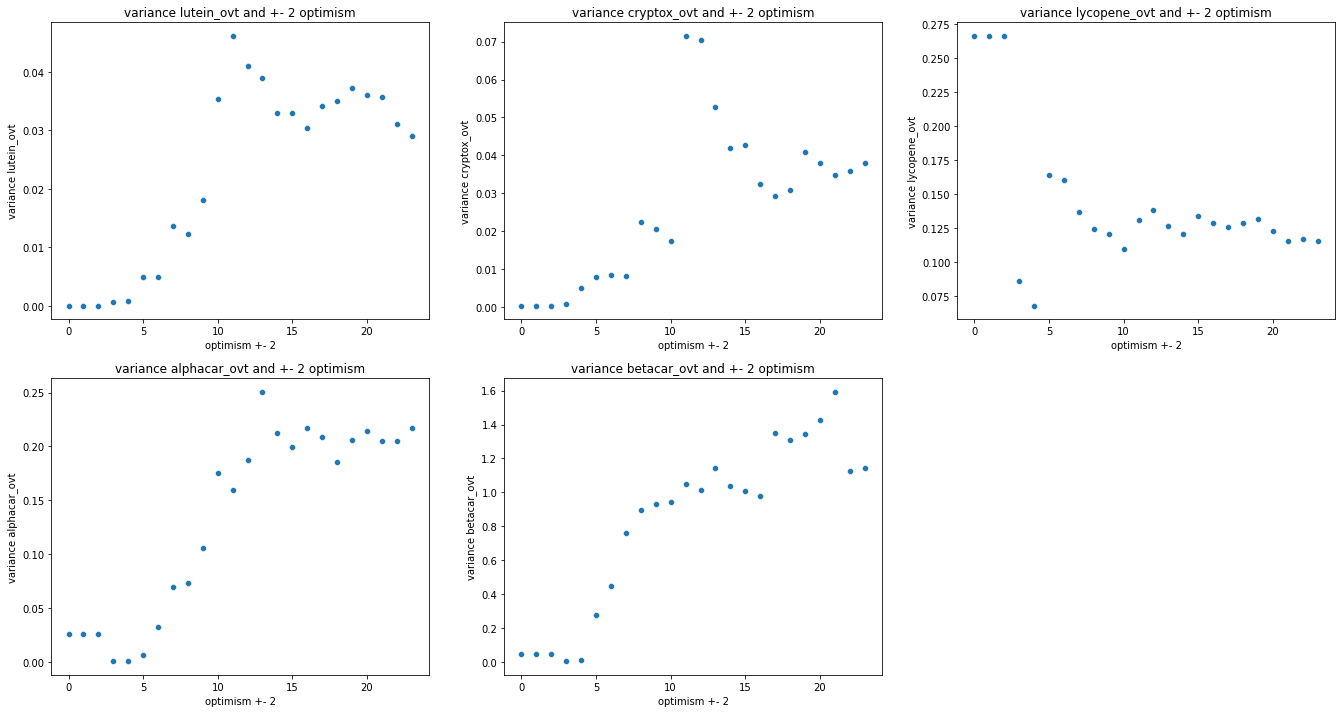

In [12]:
# Plotting the optimism intervals and variances

idx = 1
plt.figure(figsize=(23, 12))
target_col = ['lutein_ovt', 'cryptox_ovt', 'lycopene_ovt', 'alphacar_ovt', 'betacar_ovt']
for col in target_col:
  x, y = rolling_var(bcep_tf, 'optimism', col, 2)
  plt.subplot(2, 3, idx)
  sns.scatterplot(x=x, y=y)
  plt.title(f'variance {col} and +- 2 optimism')
  plt.xlabel('optimism +- 2')
  plt.ylabel(f'variance {col}')
  idx += 1

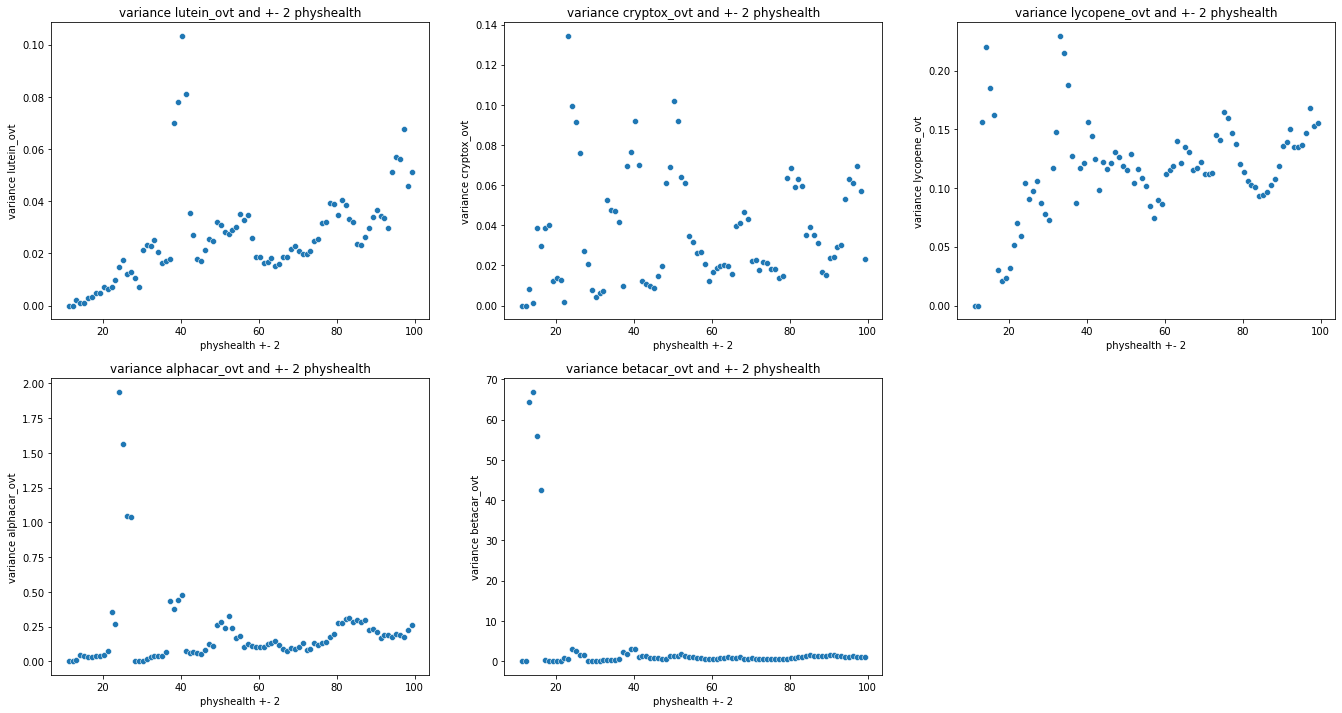

In [13]:
# Plotting the physical health intervals and variances

idx = 1
plt.figure(figsize=(23, 12))
target_col = ['lutein_ovt', 'cryptox_ovt', 'lycopene_ovt', 'alphacar_ovt', 'betacar_ovt']
for col in target_col:
  x, y = rolling_var(bcep_tf, 'physhealth', col, 2)
  plt.subplot(2, 3, idx)
  sns.scatterplot(x=x, y=y)
  plt.title(f'variance {col} and +- 2 physhealth')
  plt.xlabel('physhealth +- 2')
  plt.ylabel(f'variance {col}')
  idx += 1

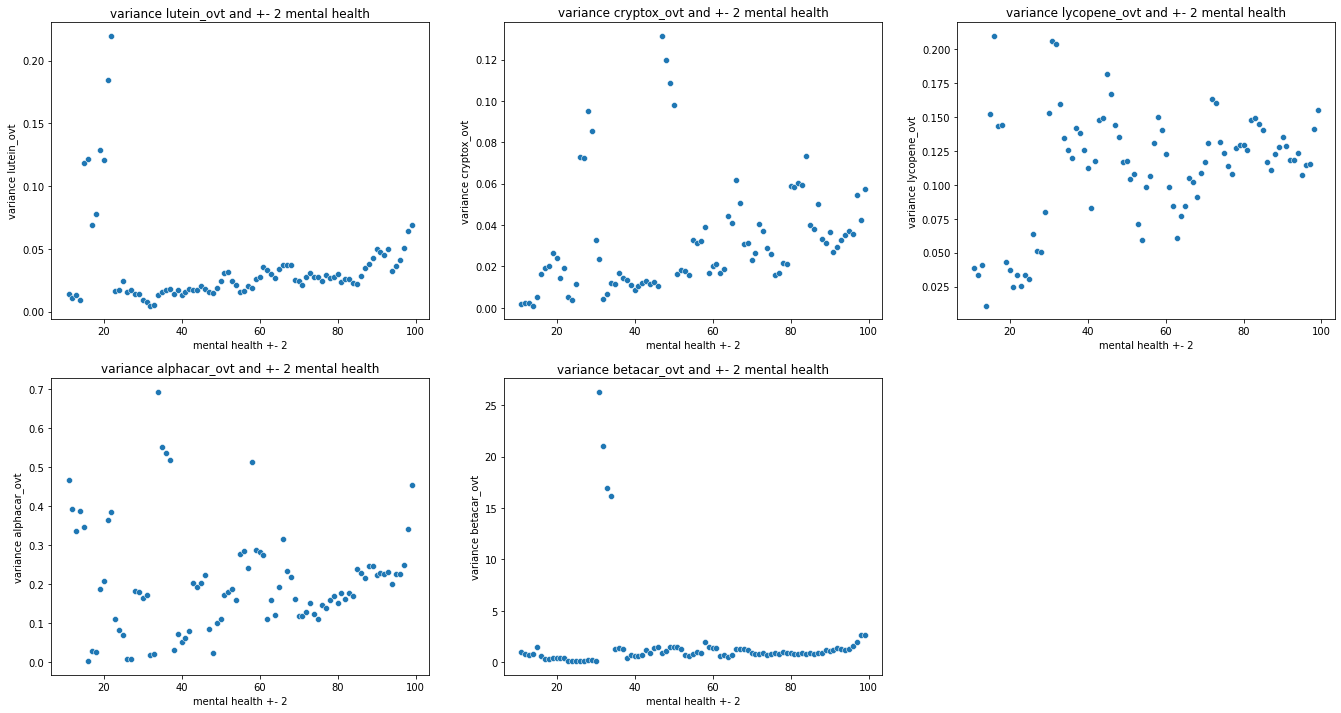

In [14]:
# Plotting the mental health intervals and variances

idx = 1
plt.figure(figsize=(23, 12))
target_col = ['lutein_ovt', 'cryptox_ovt', 'lycopene_ovt', 'alphacar_ovt', 'betacar_ovt']
for col in target_col:
  x, y = rolling_var(bcep_tf, 'mentalhealth', col, 2)
  plt.subplot(2, 3, idx)
  sns.scatterplot(x=x, y=y)
  plt.title(f'variance {col} and +- 2 mental health')
  plt.xlabel('mental health +- 2')
  plt.ylabel(f'variance {col}')
  idx += 1

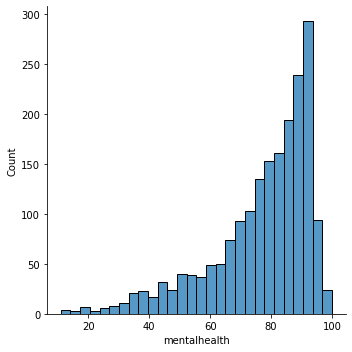

In [16]:
sns.displot(x=bcep_tf['mentalhealth'])

In [17]:
bcep_tf['mentalhealth'].min()

11.0

In [18]:
bcep_tf.columns

Index(['og_idx', 'id', 'lutein_ovt', 'cryptox_ovt', 'lycopene_ovt',
       'alphacar_ovt', 'betacar_ovt', 'intgrp', 'vitality', 'brcastatus',
       'othcstatus', 'brcacontribute', 'Year_Dx', 'grade', 'grade2', 'grade3',
       'grademiss', 'newstage', 'stage2', 'stage3', 'site0', 'recur_flag',
       'yrsdx_rand', 'yrsrand_endr', 'yrsdx_endr', 'yrsdx_endd', 'QOL',
       'optimism', 'physhealth', 'mentalhealth', 'genhlth'],
      dtype='object')

In [19]:
bcep_tf.dtypes

og_idx              int64
id                  int64
lutein_ovt        float64
cryptox_ovt       float64
lycopene_ovt      float64
alphacar_ovt      float64
betacar_ovt       float64
intgrp              int64
vitality            int64
brcastatus          int64
othcstatus        float64
brcacontribute      int64
Year_Dx             int64
grade               int64
grade2              int64
grade3              int64
grademiss           int64
newstage            int64
stage2              int64
stage3              int64
site0               int64
recur_flag          int64
yrsdx_rand        float64
yrsrand_endr      float64
yrsdx_endr        float64
yrsdx_endd        float64
QOL               float64
optimism          float64
physhealth        float64
mentalhealth      float64
genhlth           float64
dtype: object

In [34]:
# Importing dataset containing changes in patients' biomarkers over time

ovrt = pd.read_csv("ovrt_phu.csv")
ovrt.drop(columns=['Unnamed: 0', 'brcastatus'], inplace=True)
ovrt

,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,brcastatus_binary,lutein_ovt,cryptox_ovt,lycopene_ovt,alphacar_ovt,betacar_ovt
0,1018,-15.750000,5.0,0.0,0.0,-37.5,-12.5,0,-0.0347,0.0303,-0.0820,0.0918,0.8330
1,1019,1.855469,15.0,-15.0,0.0,-12.5,0.0,0,0.4003,0.0880,-0.0739,0.1937,0.3823
2,1022,-2.312500,0.0,-10.0,-2.0,-12.5,0.0,0,0.0056,-0.0503,-0.2200,0.0528,0.3148
3,1026,-7.769531,5.0,-5.0,2.0,0.0,-37.5,0,-0.1215,-0.3689,-0.3149,0.0722,0.3063
4,1027,9.625000,20.0,0.0,-1.0,12.5,37.5,0,0.1232,0.1394,0.4131,0.0773,0.9563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,13241,1.437500,5.0,5.0,-1.0,12.5,0.0,0,0.0065,0.0827,0.4094,0.0154,0.2861
1840,13242,2.187500,5.0,5.0,2.0,-12.5,0.0,0,0.0932,-0.1789,0.2133,0.1499,0.8042
1841,13243,9.937500,15.0,10.0,1.0,12.5,0.0,0,-0.0045,0.1245,-0.1687,0.0116,-0.1035
1842,13244,8.500000,0.0,-20.0,1.0,25.0,0.0,0,-0.2045,-0.0240,-0.0402,-0.1501,-0.7837
